<a href="https://colab.research.google.com/github/AyuHidayatiMunasyiroh/Belajar-Python/blob/main/Assignment_Ayu_Hidayati_Munasyiroh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Supervised Learning
Analisis data diabetes. Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari dataset ini adalah untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes, berdasarkan beberapa pengukuran diagnostik yang disertakan dalam dataset. Beberapa batasan diberlakukan pada pemilihan contoh-contoh ini dari database yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan yang berusia setidaknya 21 tahun dan berasal dari keturunan suku Indian Pima.



# Analisis Supervised Learning (Regresi Logistik Biner)

In [1]:
#Melakukan import library pada python
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Membuat database yang benama data yang berisi data diabetes
data = pd.read_csv("/content/diabetes.csv")
data.head() #melihat variabel yang dimiliki dan jenis datanya

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Penjelasan data**



*   **Pregnancies:** Jumlah kehamilan yang pernah dialami oleh individu.
*   **Glucose:** Konsentrasi glukosa dalam plasma darah, sering diukur dalam satuan miligram per desiliter (mg/dL). Glukosa adalah gula darah utama yang digunakan sebagai sumber energi oleh tubuh.
*   **BloodPressure:** Tekanan darah dalam milimeter air raksa (mmHg). Terdiri dari dua angka, tekanan sistolik (tekanan saat jantung berkontraksi) dan diastolik (tekanan saat jantung beristirahat).
*   **SkinThickness:** Ketebalan lipatan kulit di daerah trisep. Meskipun tidak selalu akurat atau representatif dari lemak tubuh secara keseluruhan, sering digunakan dalam penelitian.
*   **Insulin:** Tingkat insulin dalam serum darah. Insulin adalah hormon yang dikeluarkan oleh pankreas dan berperan dalam regulasi gula darah.
*   **BMI (Body Mass Index):** Indeks massa tubuh, dihitung sebagai berat badan (dalam kilogram) dibagi oleh kuadrat tinggi badan (dalam meter). Digunakan untuk mengevaluasi status berat badan seseorang.
*   **DiabetesPedigreeFunction:** Sebuah skor yang menggambarkan seberapa besar risiko genetik individu terhadap diabetes berdasarkan riwayat keluarga.
*  **Age:** Usia individu.
*  **Outcome:** Variabel target atau variabel dependen yang menunjukkan apakah individu tersebut mengidap diabetes atau tidak. Nilai 1 mungkin menunjukkan diabetes, sedangkan nilai 0 mungkin menunjukkan tidak mengidap diabetes.

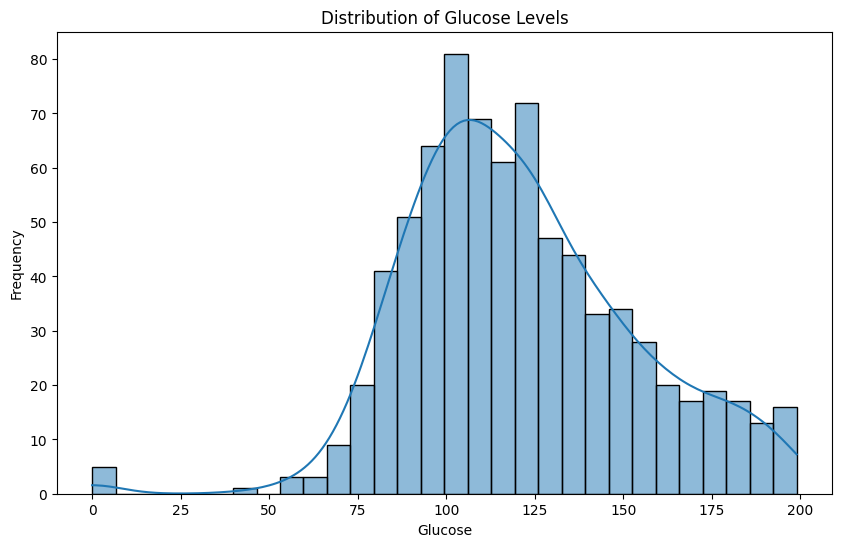

In [3]:
#@title Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram Kadar Glukosa
plt.figure(figsize=(10, 6))
sns.histplot(data['Glucose'], bins=30, kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

terdapat missing value, lebih baik dihapus saja missing value nya

In [4]:
# Menghapus nilai nol pada kolom tertentu
columns_to_clean = ['Glucose',	'BloodPressure'	, 'SkinThickness' ,	'Insulin' , 'BMI' ,	'DiabetesPedigreeFunction' , 'Age']
# Mengubah nilai nol dengan NaN
data[columns_to_clean] = data[columns_to_clean].mask(data[columns_to_clean] == 0)

# Menghapus baris yang berisikan NaN
data.dropna(inplace=True)


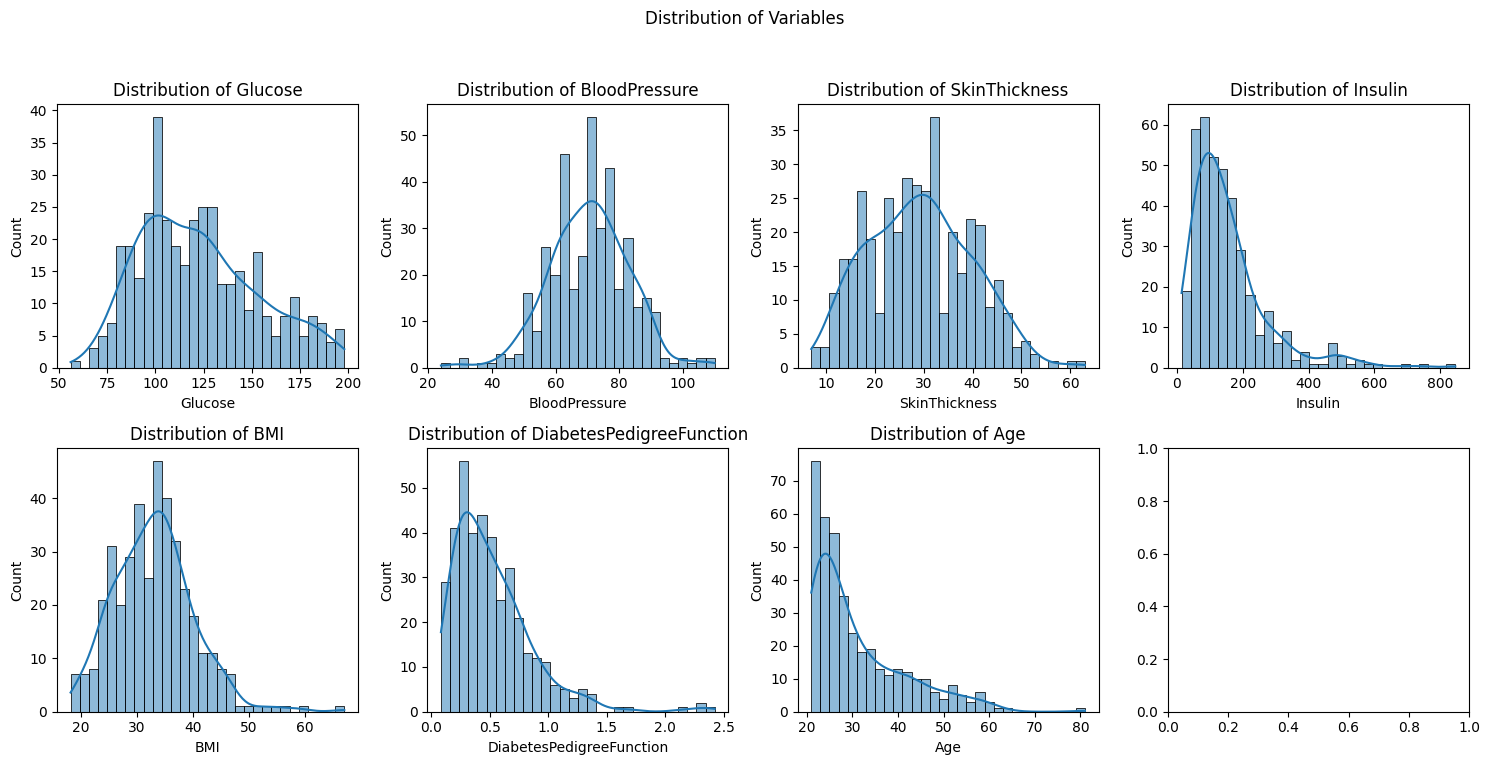

In [5]:
selected_variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Distribution of Variables')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through selected variables and plot histograms
for i, variable in enumerate(selected_variables):
    sns.histplot(data[variable], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {variable}')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

setelah missing value dihapus, datanya lebih menyebar normal. namun ada beberapa data yang tidak menyebar normal yaitu insulin, BMI, DiabetesPedigreeFunctiond dan Age.

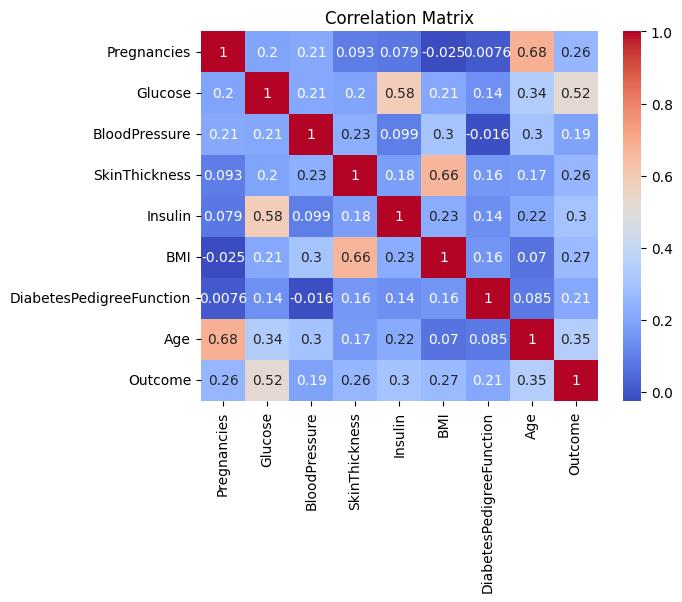

In [6]:
# Matriks Korelasi
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Matriks Korelasi (Correlation Matrix):**

Matriks korelasi adalah suatu tabel yang menggambarkan korelasi antara berbagai variabel dalam sebuah dataset. Korelasi mengukur sejauh mana dua variabel berkaitan satu sama lain. Nilai korelasi berkisar antara -1 hingga 1, di mana:

1.   1: Korelasi positif sempurna (ketika satu variabel naik, variabel lainnya juga naik).
2.   0: Tidak ada korelasi (variabel-variabel tersebut tidak berhubungan satu sama lain).
3.   -1: Korelasi negatif sempurna (ketika satu variabel naik, variabel lainnya turun).

**Tujuan Matriks Korelasi:**

*   *Identifikasi Hubungan Antara Variabel:* Matriks korelasi membantu mengidentifikasi hubungan linier antara dua atau lebih variabel. Ini membantu dalam memahami apakah perubahan dalam satu variabel berkaitan dengan perubahan dalam variabel lainnya.
*   *Deteksi Multikolinieritas:* Matriks korelasi digunakan untuk mendeteksi multikolinieritas, yaitu ketika dua atau lebih variabel independen saling berkorelasi tinggi. Multikolinieritas dapat menyulitkan interpretasi regresi dan mengurangi keakuratan hasil prediksi.

Berdasarkan matriks korelasi tidak ada korelasi yang tinggi antar variabel x. variabel x dengan variabel y yang memiliki korelasi tinggi ke rendah secara berurutan adalah
outcome dengan glucose, BMI, Age, Pregnancies, DiabetesPedigreeFunction, Insulin, SkinThickness, dan BloodPressure. (Korelasi secara Parsial)

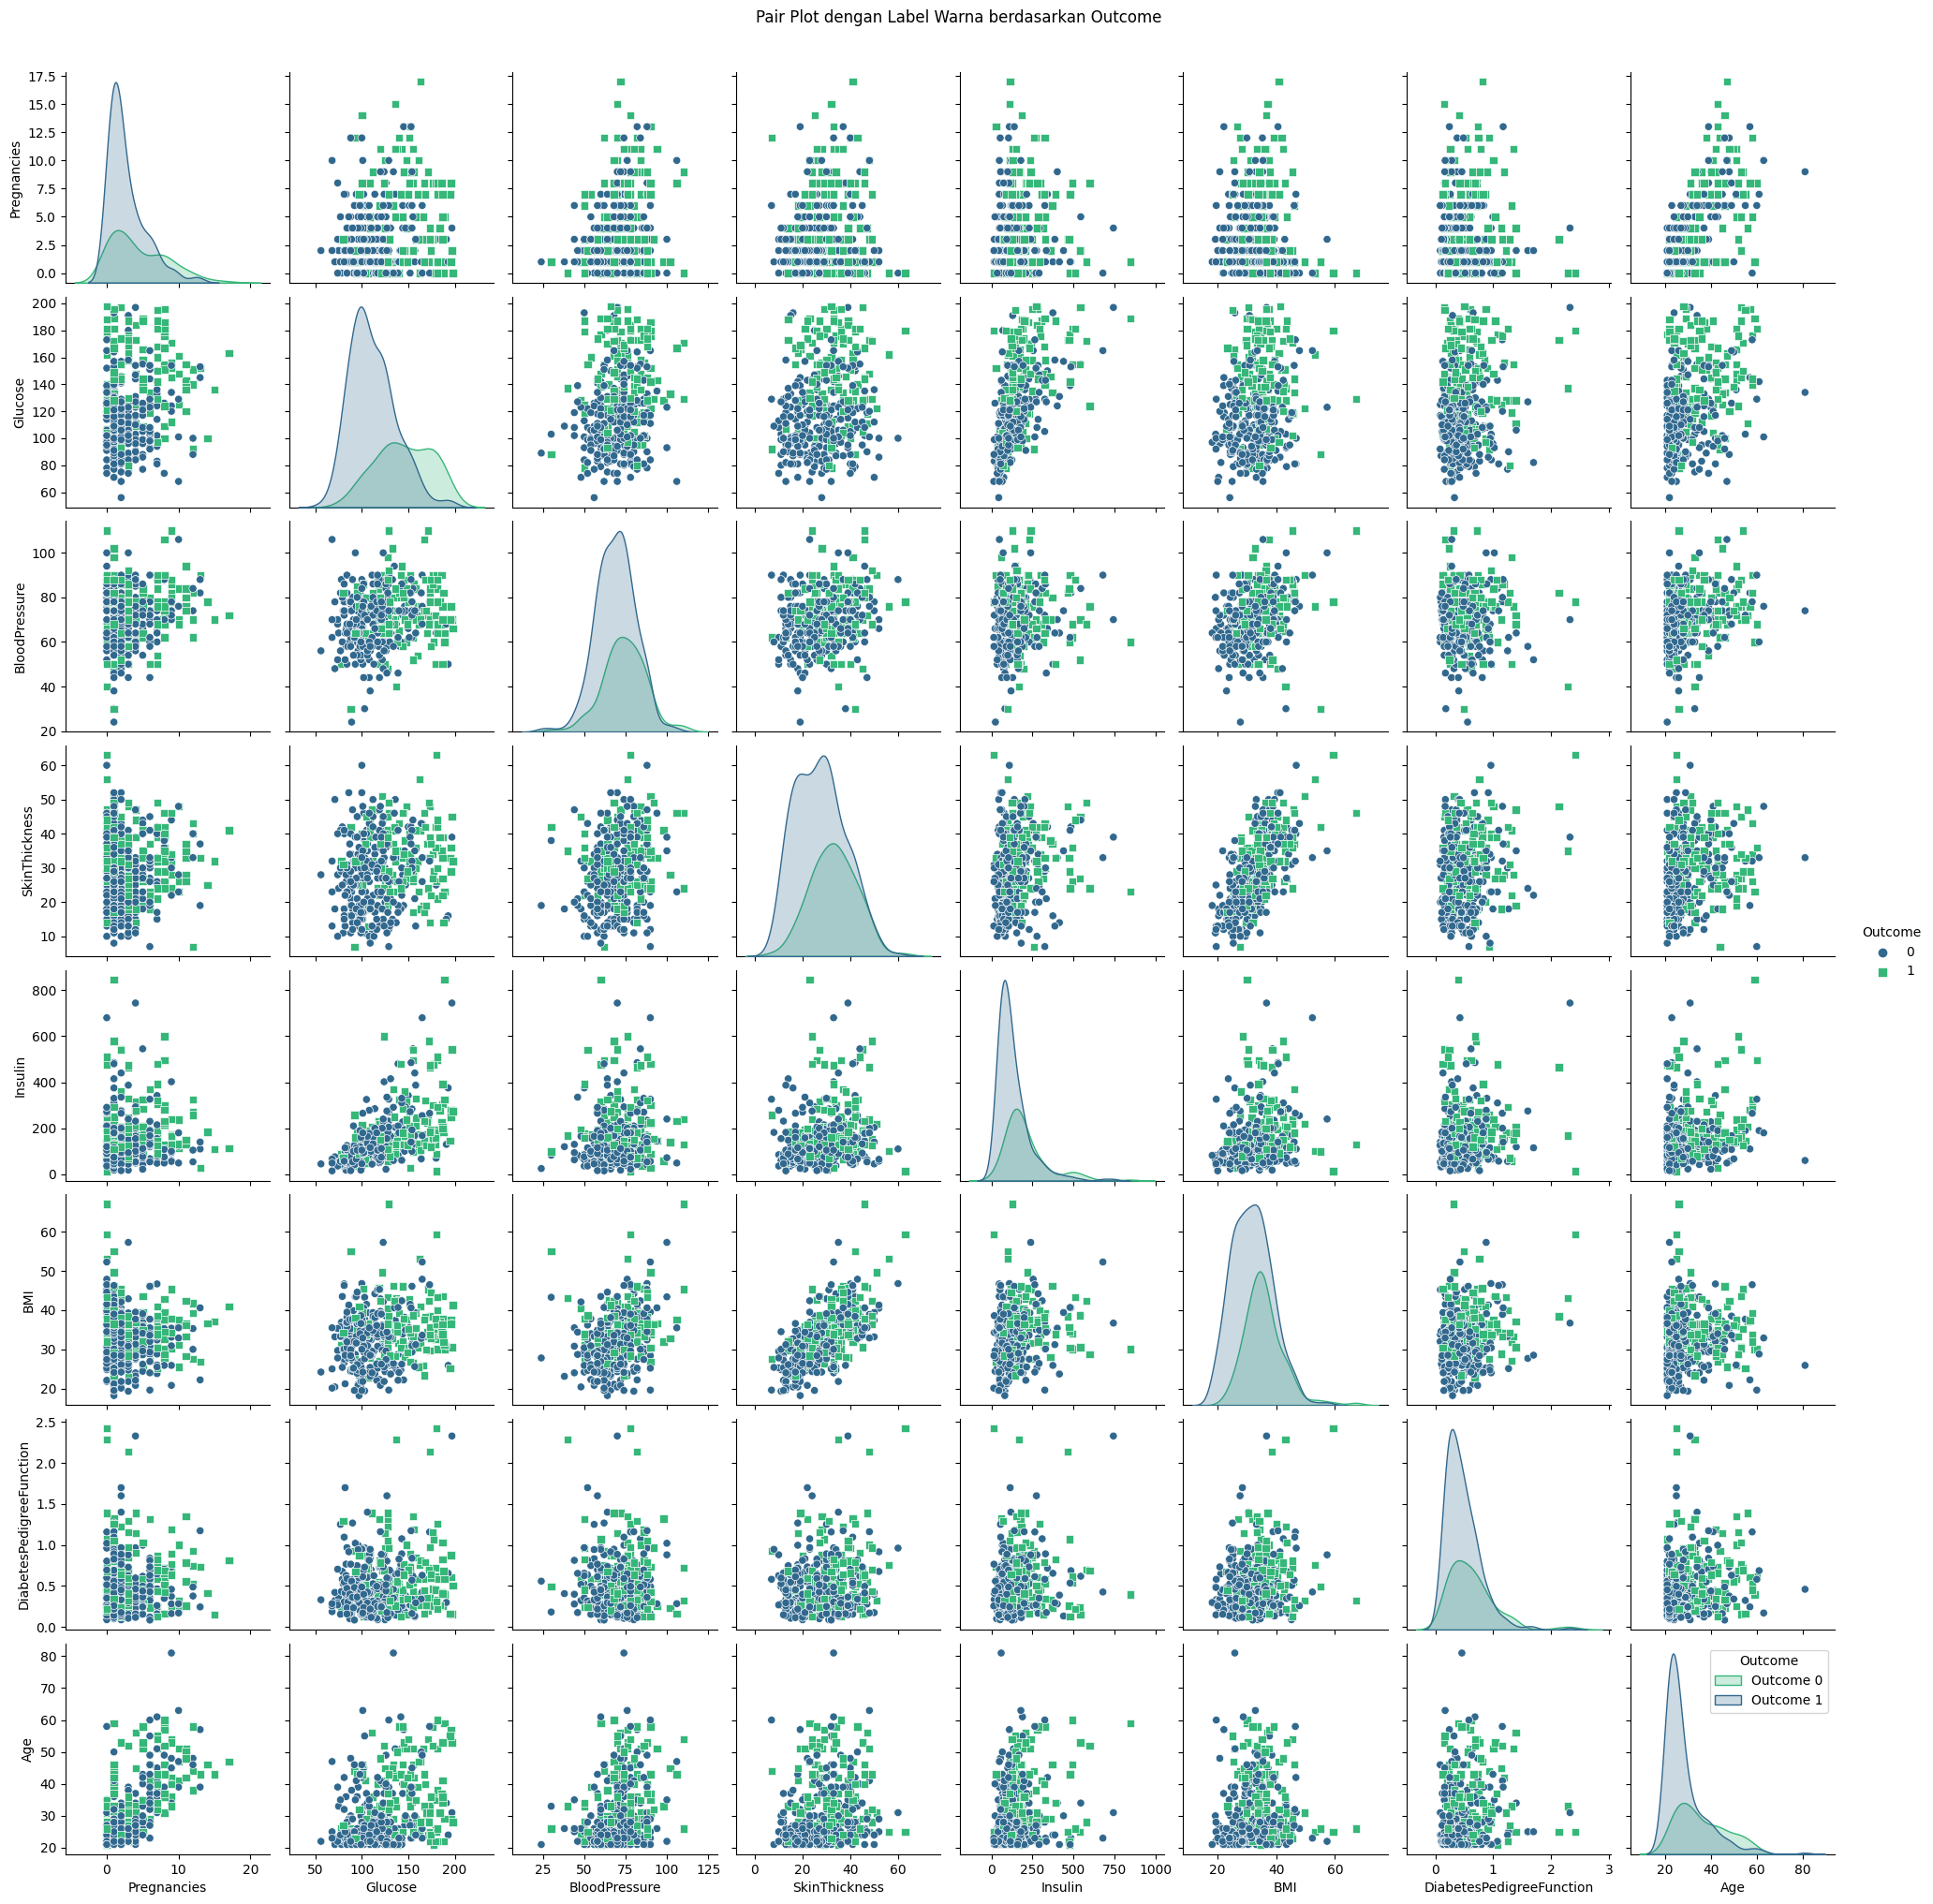

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Misalnya, 'Outcome' adalah kolom yang menyimpan label kelas
sns.pairplot(data, hue='Outcome', palette='viridis', markers=['o', 's'])

# Menambahkan judul dan label sumbu
plt.suptitle("Pair Plot dengan Label Warna berdasarkan Outcome", y=1.02)

# Menambahkan legenda
plt.legend(title='Outcome', loc='upper right', labels=['Outcome 0', 'Outcome 1'])

# Menampilkan plot
plt.show()


In [8]:
#@title Diabetes Pedigree Function
''' Penasaran apa itu diabetes pedigree function dan apakah dia adalah nilai
 yang menentukan seseorang itu diabetes atau tidak'''
# Membuat dataframe bernama df
df = pd.DataFrame(data)

# Membuat matriks berdasarkan kondisi
matriks_true_true = df[(df['DiabetesPedigreeFunction'] > 0.5) & (df['Outcome'] == 1)]
matriks_true_false = df[(df['DiabetesPedigreeFunction'] > 0.5) & (df['Outcome'] == 0)]
matriks_false_false = df[(df['DiabetesPedigreeFunction'] <= 0.5) & (df['Outcome'] == 0)]
matriks_false_true = df[(df['DiabetesPedigreeFunction'] <= 0.5) & (df['Outcome'] == 1)]

# Tabel tabulasi
tp = matriks_true_true.shape[0]
fp = matriks_true_false.shape[0]
tn = matriks_false_false.shape[0]
fn = matriks_false_true.shape[0]

# Menampilkan tabel tabulasi
tabel_tabulasi = pd.DataFrame({
    'DiabetesPedigree > 0.5 & Outcome = 1': [tp],
    'DiabetesPedigree > 0.5 & Outcome = 0': [fp],
    'DiabetesPedigree <= 0.5 & Outcome = 0': [tn],
    'DiabetesPedigree <= 0.5 & Outcome = 1': [fn]
})

print(tabel_tabulasi)

   DiabetesPedigree > 0.5 & Outcome = 1  DiabetesPedigree > 0.5 & Outcome = 0  \
0                                    74                                    94   

   DiabetesPedigree <= 0.5 & Outcome = 0  \
0                                    168   

   DiabetesPedigree <= 0.5 & Outcome = 1  
0                                     56  


True Positive (TP): Ini terjadi ketika model atau sistem klasifikasi dengan benar mengidentifikasi suatu kondisi atau kategori yang benar-benar ada. Dalam konteks medis, misalnya, TP dapat merujuk pada kasus di mana model dengan benar mengidentifikasi seseorang yang sebenarnya menderita suatu penyakit.

True Negative (TN): Ini terjadi ketika model atau sistem klasifikasi dengan benar mengecualikan atau mengidentifikasi bahwa suatu kondisi atau kategori tidak ada dan memang tidak ada. Dalam konteks medis, TN dapat merujuk pada kasus di mana model dengan benar mengidentifikasi seseorang yang sebenarnya tidak menderita suatu penyakit.

False Positive (FP): Ini terjadi ketika model atau sistem klasifikasi secara keliru mengidentifikasi suatu kondisi atau kategori yang sebenarnya tidak ada. Dalam konteks medis, FP dapat merujuk pada kasus di mana model dengan keliru mengidentifikasi seseorang yang sebenarnya tidak menderita suatu penyakit sebagai positif.

False Negative (FN): Ini terjadi ketika model atau sistem klasifikasi secara keliru gagal mengidentifikasi suatu kondisi atau kategori yang sebenarnya ada. Dalam konteks medis, FN dapat merujuk pada kasus di mana model dengan keliru gagal mengidentifikasi seseorang yang sebenarnya menderita suatu penyakit sebagai negatif.

jadi diabetes pedigree function ini bukan penentu dia diabetes atau tidak.

In [9]:
#@title Memodelkan Regresi Logistik Biner Menggunakan metode backward
# Pemisahan variabel independen (X) dan dependen (y)
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin' ,'DiabetesPedigreeFunction','BMI', 'Age']]
y = df['Outcome']

# Pembagian data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Inisialisasi model regresi logistik
model = sm.Logit(y_train, X_train)
# Pelatihan model
result = model.fit()

# Menampilkan hasil ringkasan model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.557027
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  313
Model:                          Logit   Df Residuals:                      305
Method:                           MLE   Df Model:                            7
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.1207
Time:                        07:34:08   Log-Likelihood:                -174.35
converged:                       True   LL-Null:                       -198.29
Covariance Type:            nonrobust   LLR p-value:                 3.750e-08
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1468      0.056      2.633      0.008       0.038

Metode backward adalah salah satu pendekatan dalam pemilihan variabel pada analisis regresi untuk menentukan variabel mana yang harus diikutsertakan dalam model dan mana yang harus dihapus. Secara khusus, metode backward elimination melibatkan langkah-langkah berikut:

*   **Inisialisasi Model Penuh:** Mulai dengan model yang mencakup semua variabel independen yang relevan.
*   **Fit Model:** Fit model regresi logistik atau model regresi lainnya menggunakan seluruh set variabel independen.
*   **Evaluasi Signifikansi Variabel:** Evaluasi signifikansi statistik dari setiap variabel dalam model menggunakan p-value. Jika p-value dari suatu variabel melebihi ambang batas signifikansi yang ditentukan (misalnya, 0.05), variabel tersebut dianggap tidak signifikan.
*   **Hapus Variabel yang Tidak Signifikan:** Jika terdapat variabel yang tidak signifikan, hapus variabel tersebut dari model.

Variabel yang memiliki p-value di atas 0.05 adalah BMI, Age, SkinThikness, Insulin, dan DiabetesPedigreeFunction. Untuk menangani hal tersebut maka variabel tersebut akan dihapus.

In [11]:
X1 = df[['Pregnancies', 'Glucose', 'BloodPressure']]
y1 = df['Outcome']

# Pembagian data menjadi set pelatihan dan set pengujian
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [12]:
# Inisialisasi model regresi logistik
model2 = sm.Logit(y1_train, X1_train)
# Pelatihan model
result2 = model2.fit()

# Menampilkan hasil ringkasan model
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.574489
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  313
Model:                          Logit   Df Residuals:                      310
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                 0.09318
Time:                        07:34:08   Log-Likelihood:                -179.81
converged:                       True   LL-Null:                       -198.29
Covariance Type:            nonrobust   LLR p-value:                 9.453e-09
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1508      0.042      3.624      0.000       0.069       0.232
Glucose           0.

variabel pregnancies, glucose, dan bloodpressure memiliki nilai p-value < 0.05 sehingga sudah memenuhi syarat untuk masuk ke dalam model

## Interpretasi
1.   Pregnancies:

> Koefisien positif (0.0887) menunjukkan bahwa setiap peningkatan satu unit dalam variabel "Pregnancies" dikaitkan dengan peningkatan log-odds diabetes sebesar 0.0887.
Dengan kata lain, semakin banyak kehamilan (Pregnancies), semakin tinggi kemungkinan seseorang menderita diabetes.


2.   Glucose:

> Koefisien positif (0.0121) menunjukkan bahwa setiap peningkatan satu unit dalam variabel "Glucose" dikaitkan dengan peningkatan log-odds diabetes sebesar 0.0121.
Dengan kata lain, semakin tinggi kadar glukosa darah (Glucose), semakin tinggi kemungkinan seseorang menderita diabetes.

3.   BloodPressure:

> Koefisien negatif (-0.0330) menunjukkan bahwa setiap peningkatan satu unit dalam variabel "BloodPressure" dikaitkan dengan penurunan log-odds diabetes sebesar 0.0330.
Dengan kata lain, semakin tinggi tekanan darah (BloodPressure), semakin rendah kemungkinan seseorang menderita diabetes.



# Clasification analysis

In [13]:
#@title Membuat model klasifikasi
# Import library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membagi data menjadi set pelatihan dan set pengujian.
''' variabel yang dipakai hanya 3 saja yaitu pregnancie, glucose, dan blood pressure
yang memang sudah terbukti berpengaruh terhadap diabetes'''

# Memilih kolom-kolom yang akan digunakan
selected_features = ['Pregnancies', 'Glucose', 'BloodPressure']
X1 = data[selected_features]
y1 = data['Outcome']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Pelatihan model
rf_model.fit(X1_train, y1_train)

# Prediksi pada data uji
y1_pred = rf_model.predict(X1_test)

# Evaluasi performa model
accuracy = accuracy_score(y1_test, y1_pred)
conf_matrix = confusion_matrix(y1_test, y1_pred)
classification_rep = classification_report(y1_test, y1_pred)

# Tampilkan hasil evaluasi model
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.7468354430379747
Confusion Matrix:
[[47  5]
 [15 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        52
           1       0.71      0.44      0.55        27

    accuracy                           0.75        79
   macro avg       0.73      0.67      0.69        79
weighted avg       0.74      0.75      0.73        79



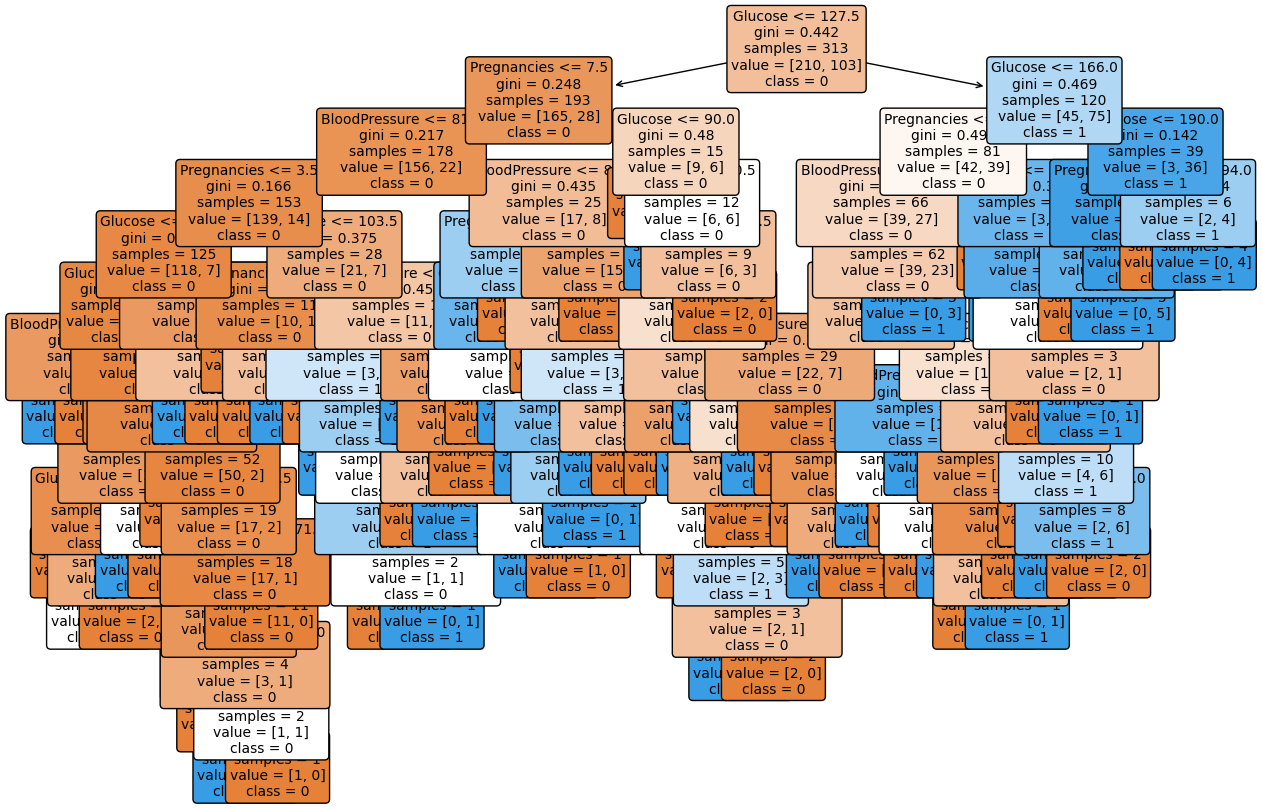

In [14]:
#@title Membuat pohon keputusan
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Pelatihan model
dt_model.fit(X1_train, y1_train)

# Visualisasi pohon keputusan
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=selected_features, class_names=['0', '1'], filled=True, rounded=True, fontsize=10)
plt.show()

jumlah daun dan cabangnya terlalu banyak sehingga perlu dilakukan optimasi

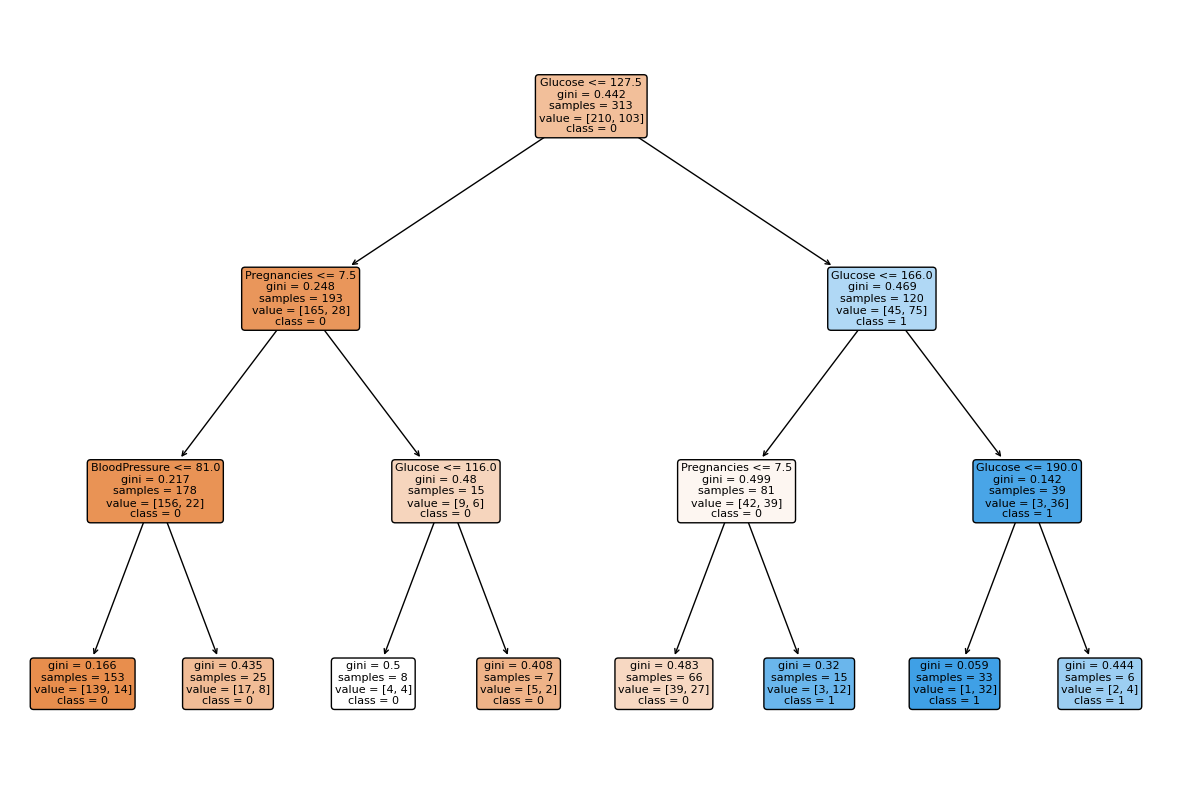

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Memilih kolom-kolom yang akan digunakan
selected_features = ['Pregnancies', 'Glucose', 'BloodPressure']
X1 = data[selected_features]
y1 = data['Outcome']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree dengan parameter untuk meminimalkan jumlah daun
dt_model = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, max_depth=3, random_state=42)

# Pelatihan model
dt_model.fit(X_train, y_train)

# Visualisasi pohon keputusan dengan jumlah daun yang diminimalkan
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=selected_features, class_names=['0', '1'], filled=True, rounded=True, fontsize=8)
plt.show()


In [16]:
# Memilih fitur-fitur dan target
selected_features = ['Pregnancies', 'Glucose', 'BloodPressure']
X1 = df[selected_features]
y1 = df['Outcome']

# Membagi data menjadi set pelatihan dan set pengujian
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree dengan parameter untuk meminimalkan jumlah daun
dt_model1 = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, max_depth=3, random_state=42)

# Pelatihan model
dt_model1.fit(X1_train, y1_train)

# Prediksi pada data uji
y1_pred = dt_model1.predict(X1_test)

# Evaluasi performa model
accuracy1 = accuracy_score(y1_test, y1_pred)
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
classification_rep1 = classification_report(y1_test, y1_pred)

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy1}')
print(f'Confusion Matrix:\n{conf_matrix1}')
print(f'Classification Report:\n{classification_rep1}')

Accuracy: 0.7215189873417721
Confusion Matrix:
[[48  4]
 [18  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        52
           1       0.69      0.33      0.45        27

    accuracy                           0.72        79
   macro avg       0.71      0.63      0.63        79
weighted avg       0.72      0.72      0.69        79



interpretasi hasil

**Accuracy: 0.7215189873417721**

Accuracy adalah rasio prediksi yang benar terhadap total jumlah prediksi. accuracy sekitar 72%, yang berarti sekitar 72% dari semua kasus di dataset uji diprediksi dengan benar oleh model.

**Confusion Matrix:**

Confusion matrix menunjukkan perbandingan antara prediksi model dan nilai sebenarnya dalam bentuk matriks. Di sini, kita memiliki:

True Positive (TP): 48

False Positive (FP): 4

False Negative (FN): 18

True Negative (TN): 9

Dari matriks ini, kita dapat melihat bahwa model cenderung melakukan prediksi yang lebih baik untuk kelas '0' (tidak terkena diabetes) daripada untuk kelas '1' (terkena diabetes).

**Classification Report:**

Precision, Recall, dan F1-score adalah metrik yang mengukur performa model untuk masing-masing kelas.

**Precision:**
Precision untuk kelas '0' (tidak terkena diabetes) adalah 0.73, yang berarti sekitar 73% dari prediksi positif untuk kelas '0' adalah benar.
Precision untuk kelas '1' (terkena diabetes) adalah 0.69, yang berarti sekitar 69% dari prediksi positif untuk kelas '1' adalah benar.

**Recall (Sensitivitas):**
Recall untuk kelas '0' adalah 0.92, yang berarti model dapat mendeteksi sekitar 92% dari total kasus yang sebenarnya '0'.
Recall untuk kelas '1' adalah 0.33, yang berarti model hanya dapat mendeteksi sekitar 33% dari total kasus yang sebenarnya '1'.

**F1-score:**
F1-score adalah rata-rata harmonik dari precision dan recall. Ini memberikan nilai yang seimbang antara precision dan recall.
F1-score untuk kelas '0' adalah 0.81.
F1-score untuk kelas '1' adalah 0.45.

# Unsupervised Analysis
Clustering Pinguins.
Data ini diambil dari kaggle dengan link [ini](https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data)

In [17]:
#Melakukan import library pada python
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
#@title Data Penguins
#Membuat database yang benama penguins yang berisi data penguins
penguins = pd.read_csv("/content/penguins.csv")
penguins.head() #melihat variabel yang dimiliki dan jenis datanya

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


Penjelasan Variabel

*   **culmen_length_mm:** Variabel ini berisi panjang culmen (paruh) dari penguin dalam milimeter. Panjang culmen dapat memberikan informasi tentang karakteristik fisik penguin dan dapat digunakan dalam analisis biometrik atau untuk mengidentifikasi spesies penguin tertentu.
*   **culmen_depth_mm:** Variabel ini berisi kedalaman culmen (paruh) dari penguin dalam milimeter. Kedalaman culmen dapat memberikan informasi tambahan tentang struktur fisik paruh dan dapat digunakan bersamaan dengan panjang culmen untuk karakterisasi lebih lanjut.

*   **flipper_length_mm:** Variabel ini berisi panjang sirip (flipper) dari penguin dalam milimeter. Panjang sirip adalah atribut penting yang dapat digunakan dalam identifikasi spesies dan memberikan wawasan tentang adaptasi penguin terhadap lingkungan mereka.

*   **body_mass_g:** Variabel berisi massa tubuh penguin dalam gram. Massa tubuh penguin adalah indikator penting kesehatan dan keadaan fisik penguin. Perubahan dalam massa tubuh dapat memberikan informasi tentang perubahan musim atau lingkungan.

*   **sex:** Variabel ini berisi jenis kelamin penguin yaitu Female dan Male

Terdapat missing value pada data, maka dapat dilakukan cleaning data

In [19]:
#@title cleaning data
# Menghapus baris yang berisikan NaN
penguins_baru = penguins.dropna()
penguins_baru = penguins_baru.reset_index(drop=True)
penguins_baru.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
#Memeriksa tipe data
penguins_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.2+ KB


In [21]:
penguins_baru.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [22]:
#Mengubah data sex menjadi numerik 1,0
# Menggunakan .loc untuk menghindari peringatan
penguins_baru.loc[:, 'sex'] = penguins_baru['sex'].map({'MALE': 1, 'FEMALE': 0})
#Memeriksa tipe data
penguins_baru.head()

<ipython-input-22-bf1ddd1960f6>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  penguins_baru.loc[:, 'sex'] = penguins_baru['sex'].map({'MALE': 1, 'FEMALE': 0})


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
3,36.7,19.3,193.0,3450.0,0.0
4,39.3,20.6,190.0,3650.0,1.0


In [23]:
penguins_baru[penguins_baru['sex'].isna()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
328,44.5,15.7,217.0,4875.0,NaN


Hal ini bisa terjadi karena penulisan data sex tidak MALE atau FEMALE. Bisa saja terjadi kesalahan penulisan sex.

In [24]:
penguins[penguins['body_mass_g']== 4875]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
308,47.5,14.0,212.0,4875.0,FEMALE
317,46.9,14.6,222.0,4875.0,FEMALE
336,44.5,15.7,217.0,4875.0,.



Jika kolom 'sex' tidak terdeteksi sebagai NaN (Not a Number) saat menggunakan isna().sum(), kemungkinan ada nilai-nilai yang mewakili nilai kosong atau string kosong ('') di dalamnya. Sehingga, meskipun kolom terlihat kosong, tetapi tidak dianggap sebagai nilai NaN oleh pandas.

In [25]:
# Ganti nilai pada indeks 328 dengan modus dari kolom 'sex'
modus_sex = penguins_baru['sex'].mode()[0]
penguins_baru['sex']=penguins_baru['sex'].fillna(modus_sex)
penguins_baru.loc[328]

culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                     1.0
Name: 328, dtype: float64

data sex yang kosong sudah diganti dengan 1 atau male

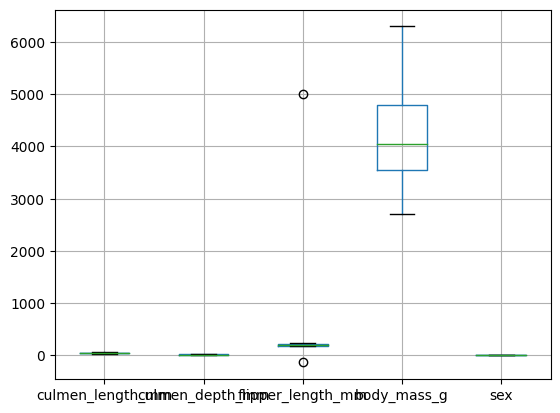

In [26]:
penguins_baru.boxplot()
plt.show()

terdapat pencilan data pada variabel flipper_length_mm yang bernilai di atas 4500 dan di bawah 0. maka dilakukan penanganan pencilan yaitu dengan menggantinya dengan median

In [27]:
# Median variabel flipper_length_mm
median_flipper_length = penguins['flipper_length_mm'].median()
print(median_flipper_length)

197.0


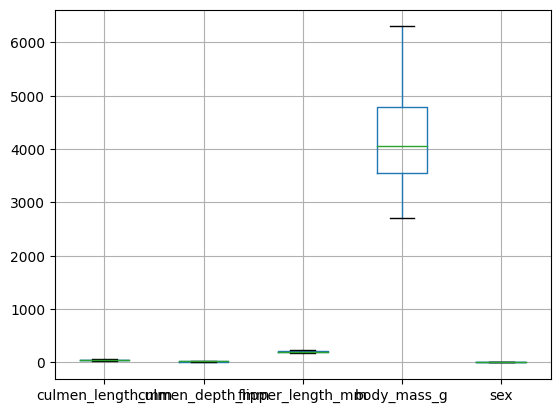

In [28]:
# Mengubah data pencilan menjadi median
penguins_baru['flipper_length_mm'] = penguins_baru['flipper_length_mm'].apply(lambda x: median_flipper_length if x > 4500 or x < 0 else x)
penguins_baru.boxplot()
plt.show()

Variabel body_mass_g memiliki satuan yang berbeda dengan variabel-variabel lain dalam dataset ini dan nilainya relatif besar. Standarisasi diperlukan untuk memastikan bahwa variabel ini memiliki dampak yang seimbang dalam perhitungan jarak saat kita menerapkan algoritma K-Means. Tanpa standarisasi, perbedaan skala ini dapat menyebabkan variabel body_mass_g mendominasi perhitungan jarak dan, akibatnya, mempengaruhi secara signifikan pembentukan cluster. Dengan standarisasi, kita memastikan bahwa setiap variabel memberikan kontribusi yang setara dalam proses clustering, memungkinkan algoritma untuk lebih baik menangkap struktur intrinsik dalam data.

In [29]:
#@title Standarisasi Data
from sklearn.preprocessing import StandardScaler
# Ekstrak kolom-kolom numerik untuk standarisasi
kolom_numerik = penguins_baru.drop('sex', axis=1)

# Standarisasi data
scaler = StandardScaler()
penguins_baru_standar = pd.DataFrame(scaler.fit_transform(kolom_numerik), columns=kolom_numerik.columns)

# Gabungkan kolom 'sex' ke DataFrame yang sudah distandarisasi
penguins_baru_standar['sex'] = penguins_baru['sex']

# Tampilkan hasil
print(penguins_baru_standar)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0           -0.897723         0.777263          -1.430337    -0.572233  1.0
1           -0.824265         0.117037          -1.072753    -0.509923  0.0
2           -0.677349         0.421757          -0.429101    -1.195338  0.0
3           -1.338472         1.081983          -0.572135    -0.946096  0.0
4           -0.860994         1.742210          -0.786685    -0.696854  1.0
..                ...              ...                ...          ...  ...
330          0.589802        -1.762070           0.929719     0.892063  0.0
331          0.516344        -1.457350           1.001236     0.798597  0.0
332          1.177467        -0.746337           1.501854     1.920186  1.0
333          0.222512        -1.203417           0.786685     1.234771  0.0
334          1.085644        -0.543190           0.858202     1.484013  1.0

[335 rows x 5 columns]


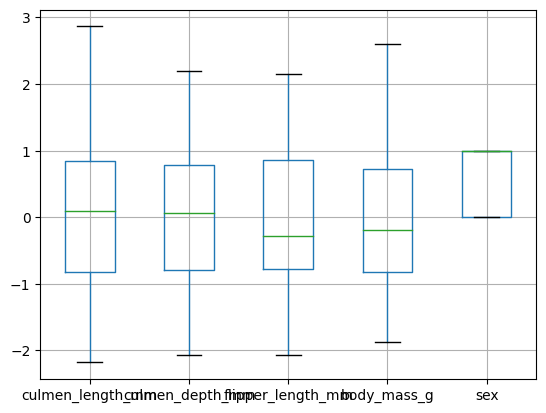

In [30]:
penguins_baru_standar.boxplot()
plt.show()

In [31]:
penguins_baru_standar.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

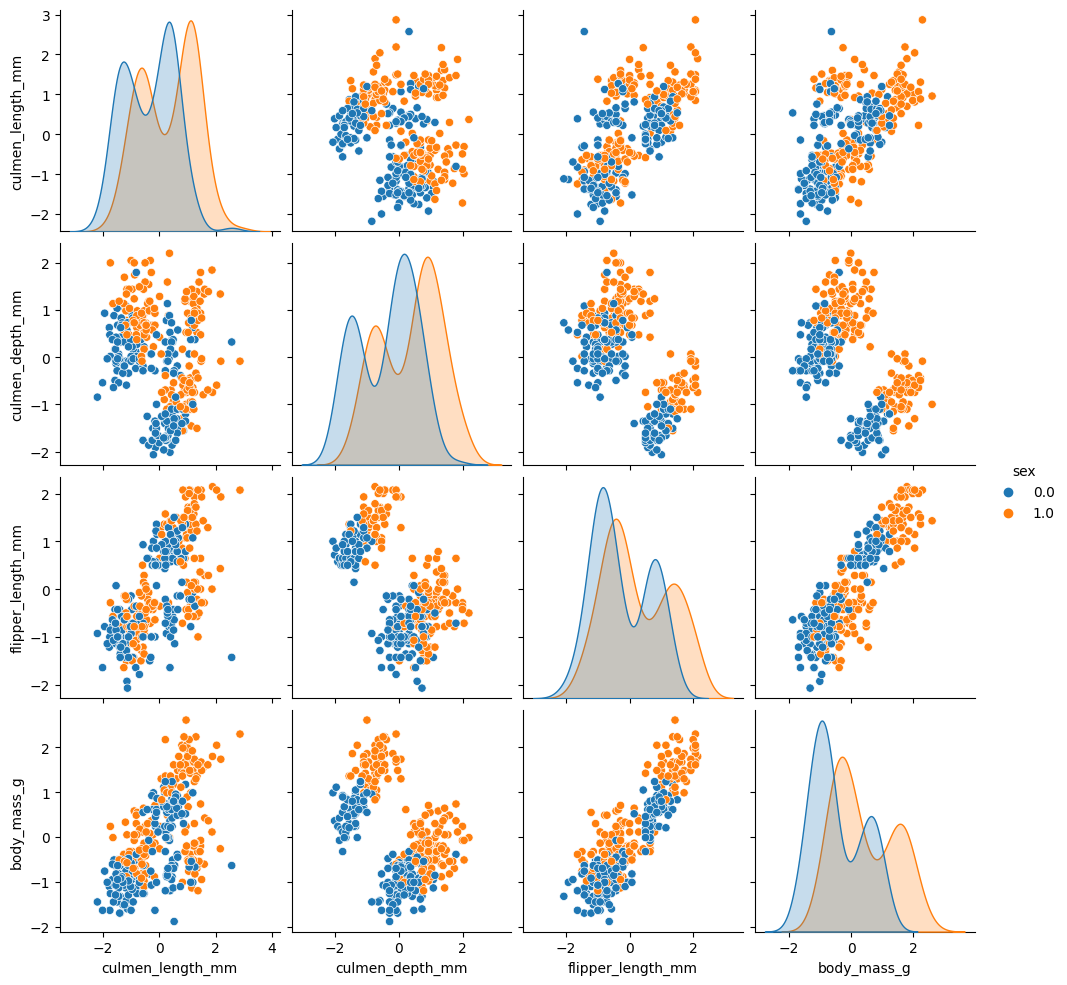

In [32]:
#@title EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plots
def plot_data(penguins_baru_standar):
    sns.pairplot(penguins_baru_standar, hue='sex')
    plt.show()

plot_data(penguins_baru_standar)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

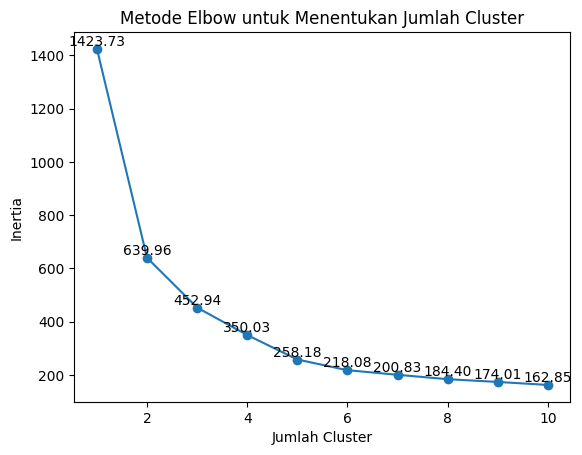

In [33]:
#@title menentukan jumlah kluster
from sklearn.cluster import KMeans
# Menentukan jumlah cluster dengan metode elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_baru_standar)
    inertia.append(kmeans.inertia_)
# Visualisasi metode elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
# Menambahkan label nilai di setiap titik pada kurva
for i, value in enumerate(inertia):
    plt.text(i + 1, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Cluster = 2, Silhouette Score: 0.5010631529355548
Jumlah Cluster = 3, Silhouette Score: 0.40849927077156256
Jumlah Cluster = 4, Silhouette Score: 0.3981919862556643


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Cluster = 5, Silhouette Score: 0.4172482147551198
Jumlah Cluster = 6, Silhouette Score: 0.4246725902268001
Jumlah Cluster = 7, Silhouette Score: 0.39024166913701086


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Cluster = 8, Silhouette Score: 0.3513469432300881
Jumlah Cluster = 9, Silhouette Score: 0.309208197074404
Jumlah Cluster = 10, Silhouette Score: 0.31697231722289754


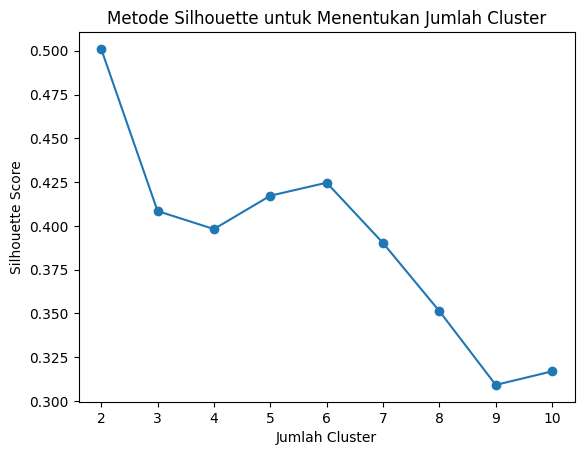

In [34]:
# Mencoba berbagai jumlah cluster dan menghitung Silhouette Score untuk masing-masing
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Mencoba berbagai jumlah cluster dan menghitung Silhouette Score untuk masing-masingnya
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(penguins_baru_standar)
    silhouette_avg = silhouette_score(penguins_baru_standar, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Jumlah Cluster = {n_clusters}, Silhouette Score: {silhouette_avg}")

# Visualisasi metode silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Metode Silhouette untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()


jumlah cluster yang disarankan adalah 2 kluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


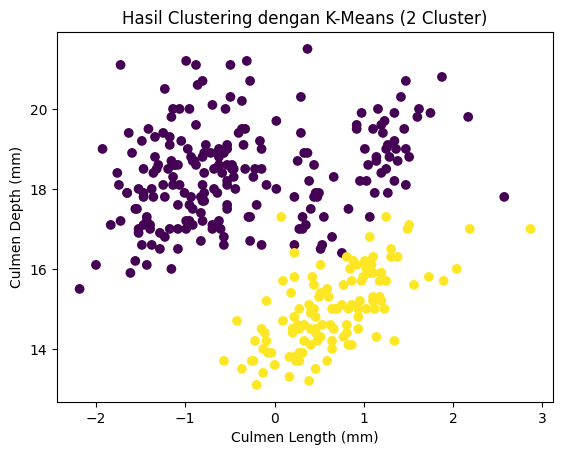

In [35]:
#@title Melakukan clustering dengan metode K-Means
# Melakukan K-Means clustering dengan jumlah cluster 2
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(penguins_baru_standar)
#Visualisasi Hasil Clustering
# Tambahkan label hasil clustering ke DataFrame
penguins_baru_standar['cluster'] = labels
# Scatter plot untuk menampilkan hasil clustering
plt.scatter(penguins_baru_standar['culmen_length_mm'], penguins_baru['culmen_depth_mm'], c=penguins_baru_standar['cluster'], cmap='viridis')
plt.title('Hasil Clustering dengan K-Means (2 Cluster)')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

In [38]:
from sklearn.metrics import adjusted_rand_score
predicted_labels = kmeans.fit_predict(kolom_numerik)
# Menghitung Adjusted Rand Index
ari_score = adjusted_rand_score(labels, predicted_labels)
print(ari_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7016738822634825


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


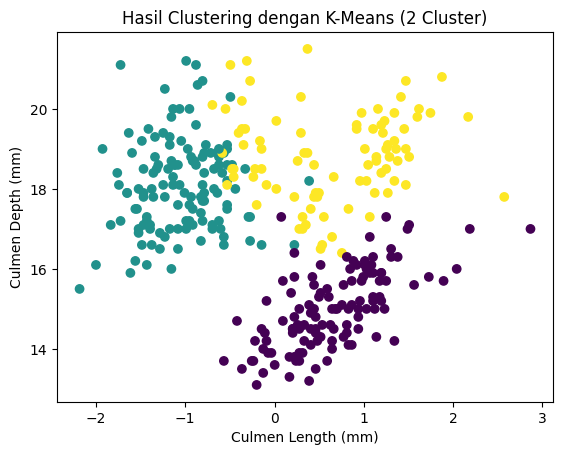

In [39]:
# Melakukan K-Means clustering dengan jumlah cluster 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(penguins_baru_standar)
#Visualisasi Hasil Clustering
# Tambahkan label hasil clustering ke DataFrame
penguins_baru_standar['cluster'] = labels
# Scatter plot untuk menampilkan hasil clustering
plt.scatter(penguins_baru_standar['culmen_length_mm'], penguins_baru['culmen_depth_mm'], c=penguins_baru_standar['cluster'], cmap='viridis')
plt.title('Hasil Clustering dengan K-Means (2 Cluster)')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

In [40]:
predicted_labels = kmeans.fit_predict(kolom_numerik)
# Menghitung Adjusted Rand Index
ari_score2 = adjusted_rand_score(labels, predicted_labels)
print(ari_score2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.37299036856751916


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


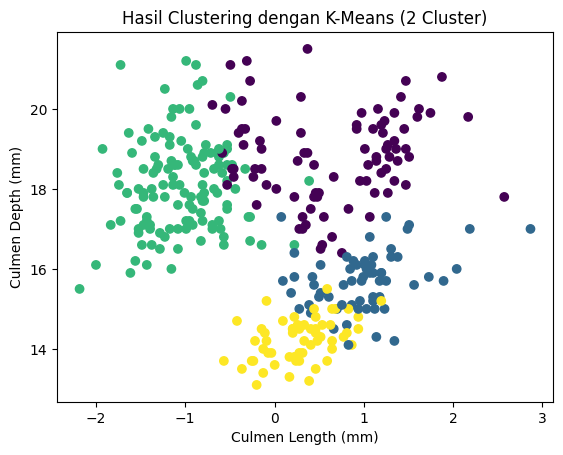

In [41]:
# Melakukan K-Means clustering dengan jumlah cluster 4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(penguins_baru_standar)
#Visualisasi Hasil Clustering
# Tambahkan label hasil clustering ke DataFrame
penguins_baru_standar['cluster'] = labels
# Scatter plot untuk menampilkan hasil clustering
plt.scatter(penguins_baru_standar['culmen_length_mm'], penguins_baru['culmen_depth_mm'], c=penguins_baru_standar['cluster'], cmap='viridis')
plt.title('Hasil Clustering dengan K-Means (2 Cluster)')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

In [42]:
predicted_labels = kmeans.fit_predict(kolom_numerik)
# Menghitung Adjusted Rand Index
ari_score3 = adjusted_rand_score(labels, predicted_labels)
print(ari_score3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.36617048185762213


Adjusted Rand Index (ARI) adalah metrik evaluasi untuk perbandingan antara dua set label, satu set label yang dihasilkan oleh algoritma clustering dan satu set label sebenarnya (ground truth). ARI memberikan informasi tentang seberapa baik clustering sesuai dengan label sebenarnya, dan nilainya berkisar dari -1 hingga 1.

*   Skor 1: Perfect match antara hasil clustering dan label sebenarnya.
*   Skor 0: Clustering tidak lebih baik daripada hasil yang dapat dihasilkan secara acak.
*   Skor -1: Clustering sangat buruk dan bertentangan dengan label sebenarnya.

Berdasarkan perhitungan di atas dapat disimpulkan bahwa jumlah cluster yang baik adalah 2 karena memiliki nilai Adjusted Rand Imdex 0.7 mendekati 1.